# 1]Importing libraries

In [204]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# 2]Data uploading

In [205]:
data=pd.read_csv('/kaggle/input/housedata/data.csv')

In [206]:
#data preview
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [207]:
#information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [208]:
#dataset describing
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [247]:
#checking for any null values in dataset
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
dtype: int64

In [248]:
#changing datatype of date to datetime
data['date'] = pd.to_datetime(data['date'])

data['date'].dt.year


0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
4595    2014
4596    2014
4597    2014
4598    2014
4599    2014
Name: date, Length: 4600, dtype: int64

In [249]:
#adding new column of year
data['year'] = data['date'].dt.year
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014


In [250]:
#changing datatype of price from object to float
data['price'] = data['price'].astype(float)

In [251]:
#replacing zero values with null 
(data['price'] == 0).sum(0)

data[data['price'] == 0].shape

data['price'].replace(0, np.nan, inplace = True)
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
dtype: int64

In [214]:
#replacing null values with mean values of price
data['price'].fillna(value = data['price'].mean(), inplace = True)
data.isnull().sum().sum()

0

In [252]:
#dropping some unnecessary columns from dataset 
df = data.drop(['date', 'street', 'statezip', 'country', 'city'], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,2014
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,2014


# 3]Data Analysing

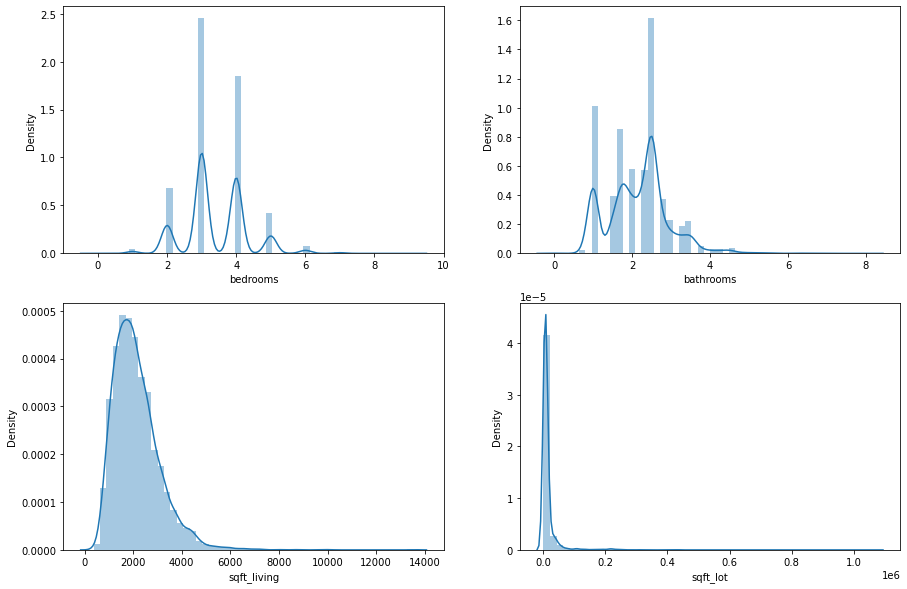

In [253]:
#comparing columns with each other with the help of graphs
plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
sns.distplot(df['bedrooms'])
plt.subplot(2,2,2)
sns.distplot(df['bathrooms'])
plt.subplot(2,2,3)
sns.distplot(df['sqft_living'])
plt.subplot(2,2,4)
sns.distplot(df['sqft_lot'])
plt.show()

(0.0, 4000000.0)

<Figure size 720x576 with 0 Axes>

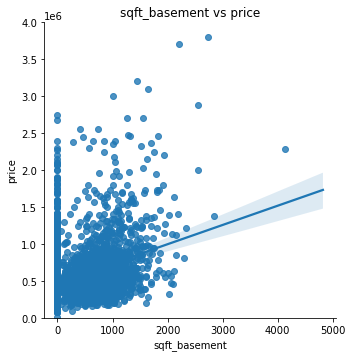

In [255]:
#plotting line plot of sqft basement wrt to price
plt.figure(figsize=(10,8))
sns.lmplot(data = df, x = 'sqft_basement', y = 'price')
plt.title('sqft_basement vs price')
plt.ylim(0,4000000.0)

(0.0, 4000000.0)

<Figure size 720x576 with 0 Axes>

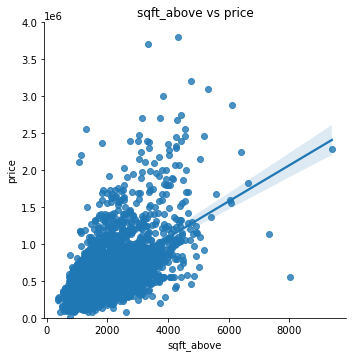

In [256]:
#plotting line plot of sqft above wrt to price
plt.figure(figsize=(10,8))
sns.lmplot(data = df, x = 'sqft_above', y = 'price')
plt.title ( 'sqft_above vs price')
plt.ylim(0,4000000.0)

(0.0, 1200000.0)

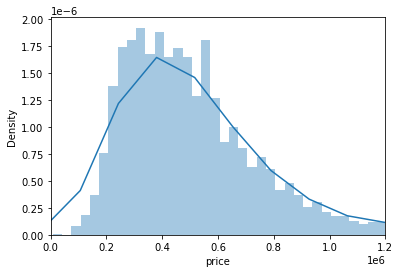

In [257]:
#plotting distplot of price 
sns.distplot(df['price'],bins=800,kde=True)
plt.xlim(0,1200000.0)

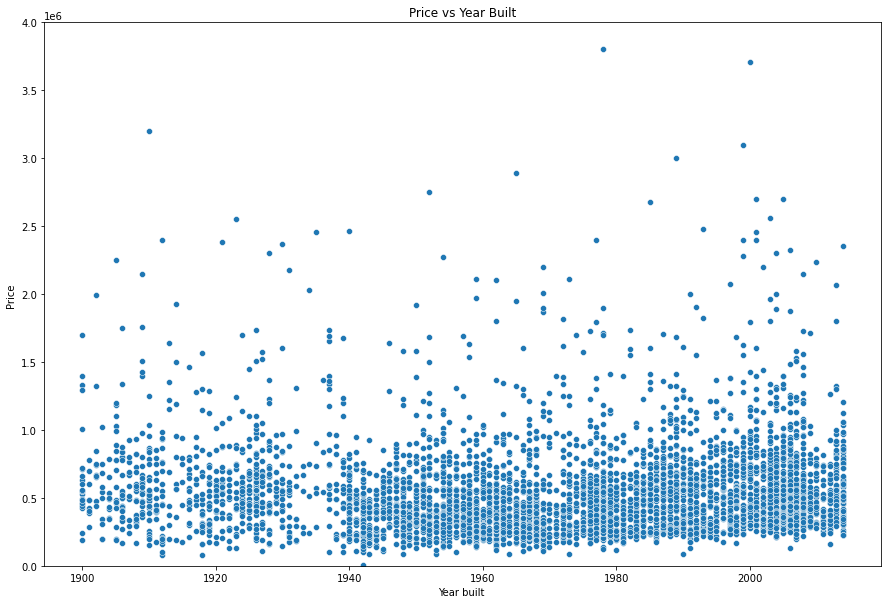

In [258]:
#plotting scatterplot of year built vs price
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x = 'yr_built', y ='price')
plt.title('Price vs Year Built')
plt.ylabel("Price ")
plt.xlabel("Year built ")
plt.ylim(0 , 4000000.0)
plt.show()  

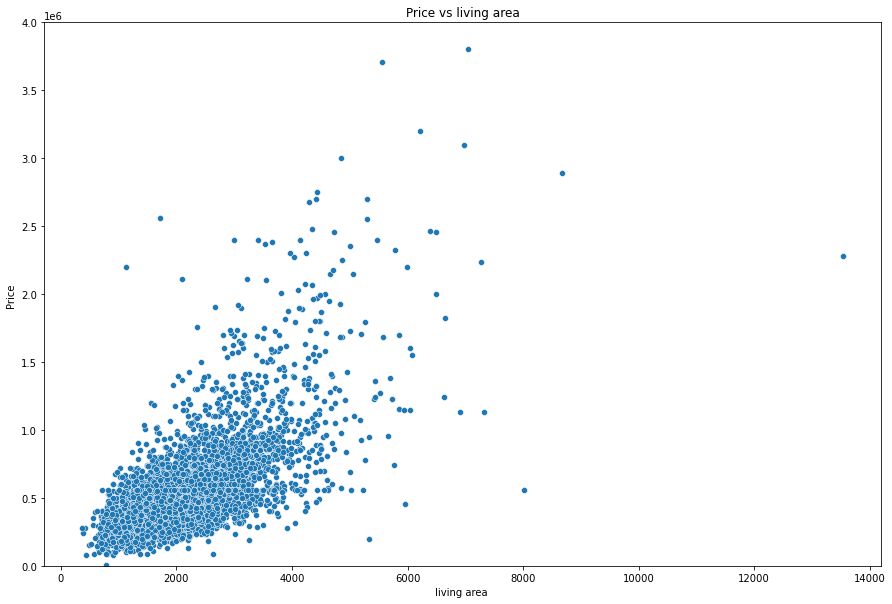

In [259]:
#plotting scatterplot of living area vs price
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x = 'sqft_living', y ='price')
plt.title('Price vs living area')
plt.ylabel("Price ")
plt.xlabel("living area ")
plt.ylim(0 , 4000000.0)
plt.show()  

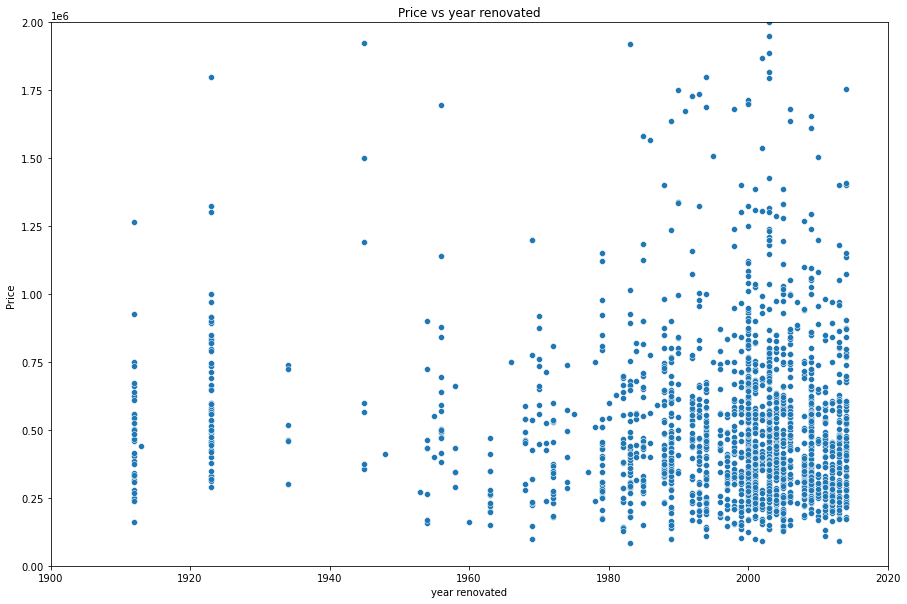

In [260]:
#plotting scatterplot of year renovated vs price
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x = 'yr_renovated', y ='price')
plt.title('Price vs year renovated')
plt.ylabel("Price ")
plt.xlabel("year renovated")
plt.ylim(0 , 2000000.0)
plt.xlim(1900,2020)
plt.show()  

In [261]:
#getting correlation between various factors of dataset
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
price,1.000000,0.208126,0.336087,0.439775,0.051186,0.152011,0.143140,0.237252,0.038566,0.375239,0.215616,0.021661,-0.028879,NaN
bedrooms,0.208126,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,NaN
bathrooms,0.336087,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,NaN
sqft_living,0.439775,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,NaN
sqft_lot,0.051186,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,NaN
floors,0.152011,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,NaN
waterfront,0.143140,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,NaN
view,0.237252,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,NaN
condition,0.038566,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,NaN
sqft_above,0.375239,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,NaN


<AxesSubplot:>

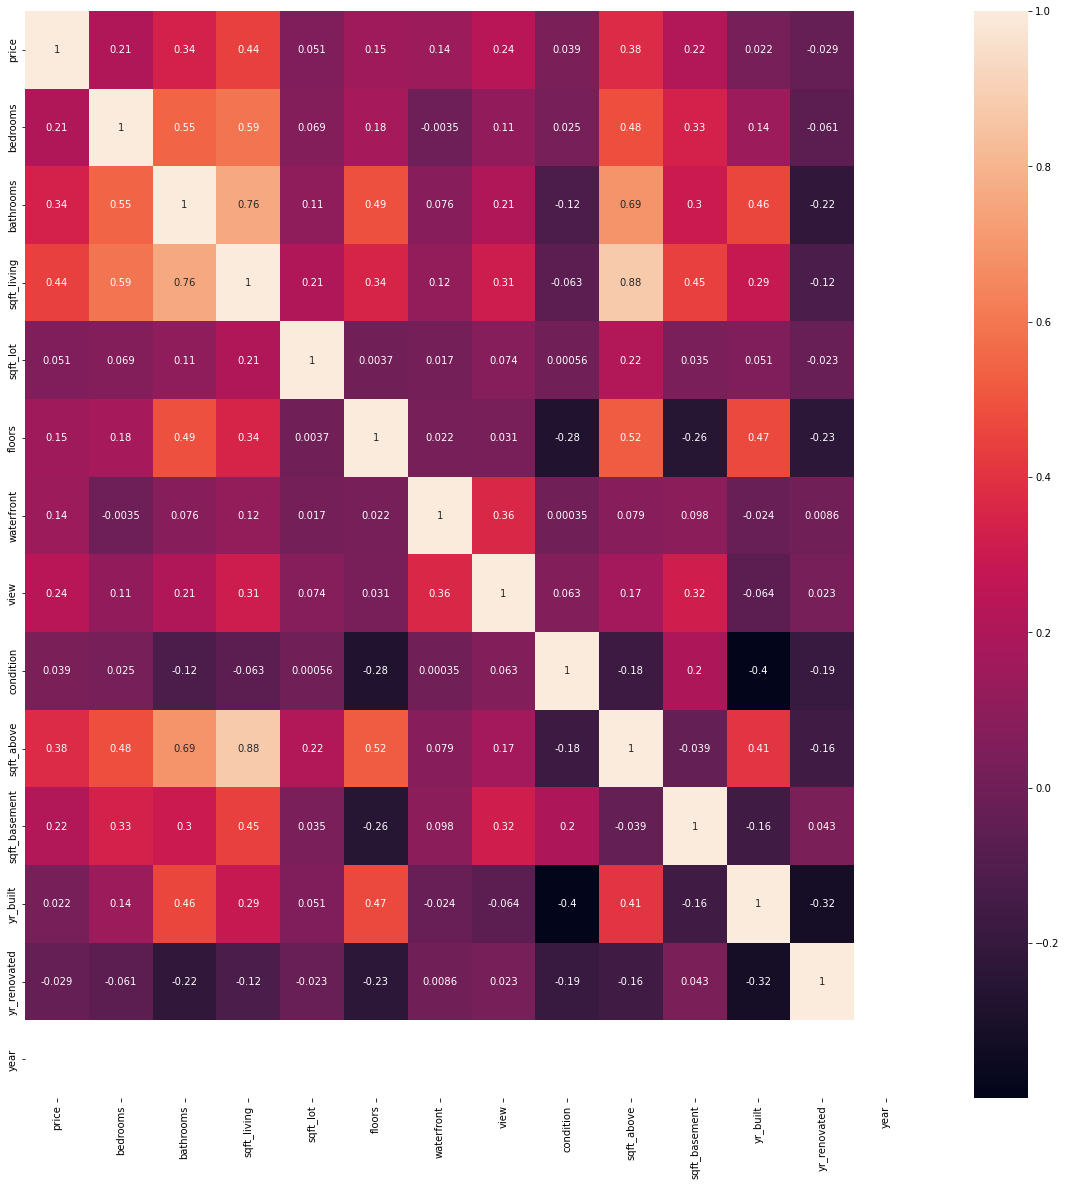

In [224]:
#plotting heatmap for showing correlation 
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)


# 4]Splitting the data

In [227]:
#assigning values for x and y
x = df.drop(columns='price')
y = df.price

In [228]:
x.drop(['yr_renovated', 'condition', 'waterfront'], axis = 1, inplace = True)

In [229]:
#previewing x values
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,year
0,3.0,1.50,1340,7912,1.5,0,1340,0,1955,2014
1,5.0,2.50,3650,9050,2.0,4,3370,280,1921,2014
2,3.0,2.00,1930,11947,1.0,0,1930,0,1966,2014
3,3.0,2.25,2000,8030,1.0,0,1000,1000,1963,2014
4,4.0,2.50,1940,10500,1.0,0,1140,800,1976,2014


In [230]:
#splitting x and y values in training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [231]:
#defining a function to calculate mae,mse,rmse,r_squared values
def evaluation(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r_squared = r2_score(y, y_pred)
    return mae, mse, rmse, r_squared

In [232]:
#creating a dataframe to get a proper tabulate form of values gathered
models = pd.DataFrame(columns = ["Model","MAE","MSE","RMSE","R2 Score"])

# 5]Checking models 

1.Linear regression


In [233]:

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 168269.60889073575
MSE: 61089740596.21358
RMSE: 247163.38846239663
R2 Score: 0.5111267997859013


In [234]:
new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index = True)

2. Ridge regression

In [235]:
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 168270.93799352724
MSE: 61089447953.545876
RMSE: 247162.7964592282
R2 Score: 0.5111291416710703


In [236]:
new_row = {"Model": "ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index = True)

3. Lasso regression

In [237]:
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 168269.83136797746
MSE: 61089808767.89665
RMSE: 247163.5263704915
R2 Score: 0.5111262542391607


In [238]:
new_row = {"Model": "lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index = True)

4. Support vector regression

In [239]:
svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 230465.91607467653
MSE: 133114095718.07785
RMSE: 364848.04469542915
R2 Score: -0.06525110979659421


In [240]:
new_row = {"Model": "svr","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index = True)

5.Random forest regression

In [241]:
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 186659.59913501338
MSE: 150967536573.4501
RMSE: 388545.4112114183
R2 Score: -0.20812401579711404


In [242]:
new_row = {"Model": "rfr","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index = True)

6. XG Booster regression

In [243]:
xgb = XGBRegressor(n_estimators = 500, learning_rate = 0.3)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 183324.17530451252
MSE: 97869760685.86386
RMSE: 312841.4305776392
R2 Score: 0.21679315309366698


In [244]:
new_row = {"Model": "xgb","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index = True)

In [262]:
#presenting dataframe
models.sort_values(["Model","MAE","MSE","RMSE","R2 Score"])

,Model,MAE,MSE,RMSE,R2 Score
0,LinearRegression,168269.608891,6.108974e+10,247163.388462,0.511127
2,lasso,168269.831368,6.108981e+10,247163.526370,0.511126
4,rfr,186659.599135,1.509675e+11,388545.411211,-0.208124
1,ridge,168270.937994,6.108945e+10,247162.796459,0.511129
3,svr,230465.916075,1.331141e+11,364848.044695,-0.065251
5,xgb,183324.175305,9.786976e+10,312841.430578,0.216793


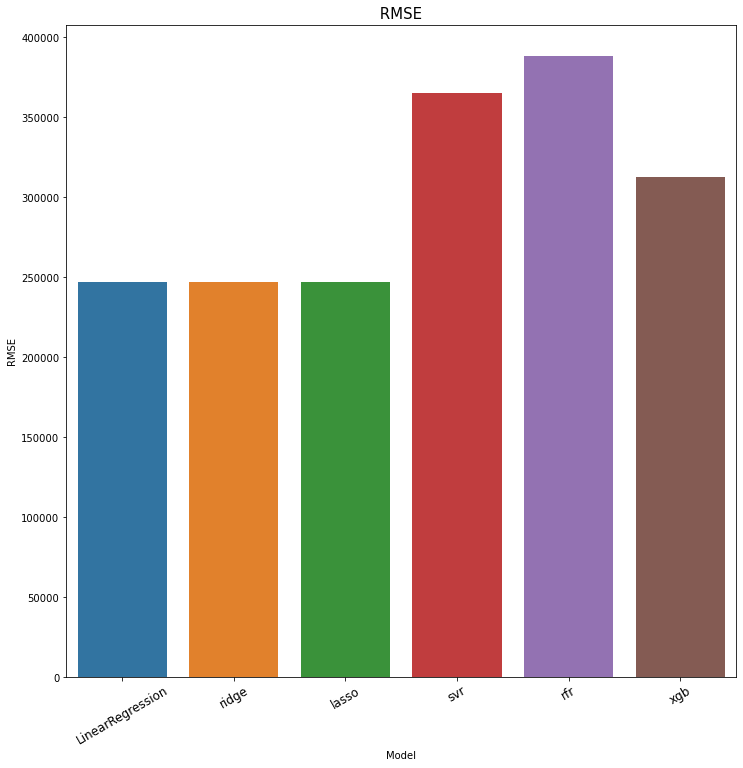

In [263]:
#plotting bargraph for showing RMSE values graphically
plt.figure(figsize = (12, 12))
sns.barplot(x = models["Model"], y = models["RMSE"])
plt.title(" RMSE ", size = 15)
plt.xticks(rotation = 30, size = 12)
plt.show()
